In [1]:
# Data Ingestion

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import math

In [2]:
data = pd.read_csv("Belgium_Dataset.csv",encoding='latin-1')
data.head(10)  #first ten observations of the data set

,Ship_to_ID,Volume_2019_customer_level,Volume_2018_customer_level,sfdc_tier,poc_image,segment,sub_segment,Product_Set,Brand,Sub_Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019,Tax,province,Discount_Total
0,29000332,0.48,0.557,Tier 0,Mainstream,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,141.20,0.00,0.00,0.48,12.23,Brussels Capital Region,0.00
1,29000441,0.45,0.540,Tier 1,Mainstream,Not applicable,Not applicable,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE,PIEDBOEUF,PIEDBOEUF TRIPLE,BOTTLE,RETURNABLE,113.65,0.00,0.00,0.45,7.85,Liège,0.00
2,29000452,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.00,238.57,3577.69,Antwerp,14511.46
3,29000452,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,6001.00,1425.19,180.00,20.40,519.41,Antwerp,1605.19
4,29000452,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,RETURNABLE,3051.36,718.32,0.00,12.00,288.63,Antwerp,718.32
5,29000507,29.61,25.860,Tier 2,Mainstream,Institutional,Institutional,"RETURNABLE_BOTTLE_JUPILER_JUPILER 0,0",JUPILER,"JUPILER 0,0",BOTTLE,RETURNABLE,104.10,0.00,0.00,0.30,1.55,Namur,0.00
6,29000507,29.61,25.860,Tier 2,Mainstream,Institutional,Institutional,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,176.50,0.00,0.00,0.60,15.27,Namur,0.00
7,29000507,29.61,25.860,Tier 2,Mainstream,Institutional,Institutional,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF BLONDE,PIEDBOEUF,PIEDBOEUF BLONDE,BOTTLE,RETURNABLE,2227.65,0.00,686.13,11.34,61.37,Namur,686.13
8,29000507,29.61,25.860,Tier 2,Mainstream,Institutional,Institutional,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF FONCEE,PIEDBOEUF,PIEDBOEUF FONCEE,BOTTLE,RETURNABLE,3412.19,0.00,1050.98,17.37,94.12,Namur,1050.98
9,29000721,0.42,0.505,Tier 2,Mainstream,Institutional,Institutional,"RETURNABLE_BOTTLE_JUPILER_JUPILER 0,0",JUPILER,"JUPILER 0,0",BOTTLE,RETURNABLE,20.82,6.15,0.00,0.06,0.31,Antwerp,6.15


In [3]:
data.shape

(39859, 19)

In [4]:
data.Ship_to_ID.unique().shape

(4568,)

In [5]:
# sns.countplot(x= 'Ship_to_ID', data= data)

In [6]:
#frequency 
frequency_table = pd.crosstab(index=data['Ship_to_ID'], columns='count')
print(frequency_table)
print(type(frequency_table))

col_0       count
Ship_to_ID       
29000332        1
29000441        1
29000452        3
29000507        4
29000721        2
...           ...
29949357        1
29949379        2
29949415        1
29949533       35
29950485        4

[4568 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [7]:
frequency_table.sort_values(by=['count'], inplace = True)
print(frequency_table)

col_0       count
Ship_to_ID       
29000332        1
29033040        1
29033051        1
29083285        1
29082976        1
...           ...
29025044       42
29023530       42
29039114       53
29081238       54
29077441       56

[4568 rows x 1 columns]


<AxesSubplot:xlabel='Ship_to_ID', ylabel='count'>

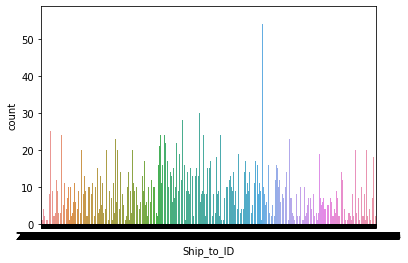

In [8]:
sns.countplot(x = 'Ship_to_ID', data = data)

In [9]:
data.drop(columns="Ship-to ID" , inplace = True, axis =1) #because ship-to id is unique to everyone and is insignificant to the result
data.head() 

KeyError: "['Ship-to ID'] not found in axis"

In [ ]:
print("Total Rows = " + str(data.shape[0]) + "\nTotal Columns = " + str(data.shape[1])) 

Clearly, Dataset comprises of 39859 observations and 19 characteristics.


In [ ]:
data.info() #columns and corresponding data types, finding whether they contain null values or not

No variable column has null/missing values.

In [ ]:
data.describe()

In [ ]:
data.nunique()

In [ ]:
#Data Wrangling

#We will examine each attribute and look for outliers and redundancies

data.sfdc_tier.unique()

In [ ]:
data.poc_image.unique()

In [ ]:
(data.poc_image=='0').sum() 

In [ ]:
#We need to drop the 0 values

data = data.loc[data["poc_image"] != '0']
data.shape

In [ ]:
data.segment.unique()

In [ ]:
(data.segment=='Not applicable').sum() 

In [ ]:
#We need to drop the Not Applicable values

data = data.loc[data["segment"] != 'Not applicable']
data.shape

In [ ]:
data.sub_segment.unique()

In [ ]:
data.Product_Set.unique().shape

In [ ]:
data.Brand.unique()

In [ ]:
data.Sub_Brand.unique().shape

In [ ]:
data.Pack_Type.unique()

In [ ]:
sns.countplot(x="Pack_Type", data= data)

In [ ]:
data.Returnalility.unique()

In [ ]:
sns.countplot(x="Returnalility", data= data)

In [ ]:
data.province.unique()

Volume_2018_customer_level, Volume_2018_customer_level, OnInvoice Discount(LCU), OffInvoice Discount(LCU), Volume_2019,Tax and Discount_Total have continuous values.

In [ ]:
# feature processing

poc_image = pd.get_dummies(data['poc_image'], drop_first = True)
# 0 corresponds to mainstream, 1 corresponds to premium

sfdc_tier = pd.get_dummies(data['sfdc_tier'], drop_first = True)
# 0 0 corresponds to tier 3

Returnalility= pd.get_dummies(data['Returnalility'], drop_first = True)
# 1 corresponds to returnable, 0 corresponds to OW

data= pd.concat([data, poc_image, sfdc_tier, Returnalility], axis = 1)
data.drop([ 'poc_image', 'Returnalility'], axis =1, inplace = True)
data.head()

We would like to add another column which determines the change in the consumption by the consumer.
Also, we will like to specially identify the new customers, i.e have "Volume_2018_customer_level = 0"


In [ ]:
diff = (data.Volume_2019_customer_level - data.Volume_2018_customer_level)*1
data.insert(2, "Difference", diff, True)

new_customer = (data.Volume_2018_customer_level==0)*1
data.insert(2, "New_customer", new_customer, True)

data.drop(['Volume_2019_customer_level', 'Volume_2018_customer_level'], axis = 1, inplace = True)

data.head()

In [ ]:
data.drop(['OnInvoice Discount(LCU)', 'OffInvoice Discount(LCU)', 'Product_Set'], axis = 1, inplace = True)

#Since we are only calculating only total_discount for now

In [ ]:
data.head()

In [ ]:
#We can analyse the relationship between the parameters through corelation

corelation = data.corr()
sns.heatmap(corelation, xticklabels= corelation.columns, yticklabels = corelation.columns, annot = True)

In [ ]:
#observing the relationship between Volume_2019, Discount_Total and GTO_2019

n= data.shape[0] + 1

x = list(range(1, n))
y = data.Volume_2019
plt.plot(x, y) 
plt.xlabel('Serial Number')
plt.ylabel('Volume_2019')
plt.show()

x = list(range(1, n))
y = data.Discount_Total 
plt.plot(x, y) 
plt.xlabel('Serial Number')
plt.ylabel('Discount_Total')
plt.show()


x = list(range(1, n))
y = data.GTO_2019
plt.plot(x, y)
plt.xlabel('Serial Number')
plt.ylabel('GTO_2019')
plt.show()

We can clearly see that the shape of the graphs is very similar, which indicates that they have a linear relationship.

In [ ]:
data = data.loc[data["Volume_2019"] != 0]

GTO_per_unit_vol = data.GTO_2019 / data.Volume_2019
data.insert(2, "GTO_per_unit_vol", GTO_per_unit_vol, True)

Tax_per_unit_vol = data.Tax / data.Volume_2019
data.insert(2, "Tax_per_unit_vol", Tax_per_unit_vol, True)

data.drop(['Volume_2019', 'GTO_2019','Tax'], inplace= True, axis = 1)

In [ ]:
n = data.shape[0] + 1
# x axis values
x = list(range(1, n))
# corresponding y axis values
y = data.GTO_per_unit_vol
 

plt.ylim([-40000, 25000])

# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Serial Number')
# naming the y axis
plt.ylabel('GTO_per_unit_vol')
 
# function to show the plot
plt.show()

We need to maximise the GTO/Volume, so we can omit the negative values.

In [ ]:
data = data.loc[data["GTO_per_unit_vol"] > 0]
data.shape

In [ ]:
n = data.shape[0] + 1
# x axis values
x = list(range(1, n))
# corresponding y axis values
y = data.GTO_per_unit_vol
 

plt.ylim([0, 25000])

# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Serial Number')
# naming the y axis
plt.ylabel('GTO_per_unit_vol')
 
# function to show the plot
plt.show()

Clearly, there are some outliers which we have to figure out.

In [ ]:
(data.GTO_per_unit_vol>=5000).sum()

In [ ]:
data = data.loc[data["GTO_per_unit_vol"] < 5000]

In [ ]:
n = data.shape[0] + 1
# x axis values
x = list(range(1, n))
# corresponding y axis values
y = data.GTO_per_unit_vol
 

plt.ylim([0, 2800])

# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Serial Number')
# naming the y axis
plt.ylabel('GTO_per_unit_vol')
 
# function to show the plot
plt.show()

In [ ]:
data_high = data.loc[data["GTO_per_unit_vol"] > 500]
data_high.shape

Lets observe the high GTO/Vol values

In [ ]:
data_high.head(10)

In [ ]:
sns.countplot(x="Pack_Type", data= data_high)

In [ ]:
sns.countplot(x = "sfdc_tier", data= data_high)

In [ ]:
sns.countplot(x = "province", hue = 'sfdc_tier', data= data_high)

In [ ]:
sns.countplot(x = "Brand", data= data_high)

In [ ]:
sns.countplot(x = "segment", data= data_high)

In [ ]:
sns.countplot(x = "RETURNABLE", data= data_high)

Clearly there are specific attribute distribution.

In [ ]:
data.drop('sfdc_tier', axis = 1, inplace = True)
data.head()

We will be making a different set of data for people visiting for the first time.

In [ ]:
data_new_customers= data.loc[data["New_customer"]==1]
data_new_customers.drop(['New_customer','Difference'], axis=1, inplace = True)
data_new_customers.shape

In [ ]:
data_new_customers.head()

In [ ]:
data_not_new = data.loc[data["New_customer"]==0]
data_not_new.drop('New_customer', axis = 1, inplace = True)

Now, we can also make a dataset of customers who ordered less product than 2018

In [ ]:
data_diff_neg = data_not_new.loc[data["Difference"]<0]
data_diff_neg.drop('Difference', axis = 1, inplace =True)
data_diff_neg.shape

In [ ]:
data_diff_neg.head()

Similarly, we can make a set of customers ordered equal or more than 2018

In [ ]:
data_diff_noneg = data_not_new.loc[data["Difference"]>=0]
data_diff_noneg.drop('Difference', axis = 1, inplace =True)
data_diff_noneg.shape

In [ ]:
data_diff_noneg.head()

In [ ]:
data.to_csv(r'C:\Users\shrey\ML\ABinBev\data.csv', index=False)
data_new_customers.to_csv(r'C:\Users\shrey\ML\ABinBev\data_new_customers.csv', index=False)
data_diff_neg.to_csv(r'C:\Users\shrey\ML\ABinBev\data_diff_neg.csv', index=False)
data_diff_noneg.to_csv(r'C:\Users\shrey\ML\ABinBev\data_diff_noneg.csv', index=False)